# Titanic生存预测

任务：生存预测。二分类人物

In [27]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## 数据预处理

### 数据读入

In [3]:
test_data=pd.read_csv("../data/titanic/test.csv")
train_data=pd.read_csv("../data/titanic/train.csv")
combine =[test_data,train_data]

In [25]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
print("列属性信息：",train_data.columns.values)
row_num1,col_num1=test_data.shape
row_num2,col_num2=train_data.shape
print(f'there are {row_num1} rows and {col_num1} oclumns in test_data')
print(f'there are {row_num2} rows and {col_num2} oclumns in train_data')

列属性信息： ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
there are 418 rows and 11 oclumns in test_data
there are 891 rows and 12 oclumns in train_data


训练数据中一共891名旅客信息，测试数据中一共有418名旅客信息。
数据的列信息：
1. 乘客id，年龄，姓名，船票费用，性别，Pclass乘客等级:1表示一等；2表示二等；3表示三等。
2. Survived:获救情况。1表示获救，0表示死亡。 
3. sibsp（堂兄弟妹个数） Parch父母与小孩的个数 Embarked（登船港口）

### 数据预处理

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


训练数据中Age、Cabin、Embarked中有缺失值测试数据中，Age、Fare、Cabin中存在缺失数据

In [57]:
#用来查看数值类属性的分布情况
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
# 查看类别类属性的分布情况
train_data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


1. 在训练数据中，有38%的乘客存活下来
2. 从年龄的角度而言，50%的乘客的年龄在20~38岁之间
3. 船票的角度而言，方差很大，最高费用为512，最低为0.
4. 每位乘客的名字都不同，乘客数量和名字的unique数量相等（891）
5. 有577名男性，占比为64.76%

In [54]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [29]:
data[data.isna().any(axis=1)]

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
61,62,38.0,80.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,NaN,0,0,1
829,830,62.0,80.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,NaN,0,0,1


Embarked（登船港口）存在数据缺失

In [31]:
data['Embarked'].value_counts()

Embarked
2.0    914
0.0    270
1.0    123
Name: count, dtype: int64

In [39]:
data['Embarked']=data['Embarked'].fillna(0)
data['Embarked'].value_counts()

Embarked
2.0    914
0.0    272
1.0    123
Name: count, dtype: int64

In [42]:
data.duplicated().any()

np.False_

### 数据洞察

In [126]:
plt.rcParams['font.sans-serif'] = ['SimHei']

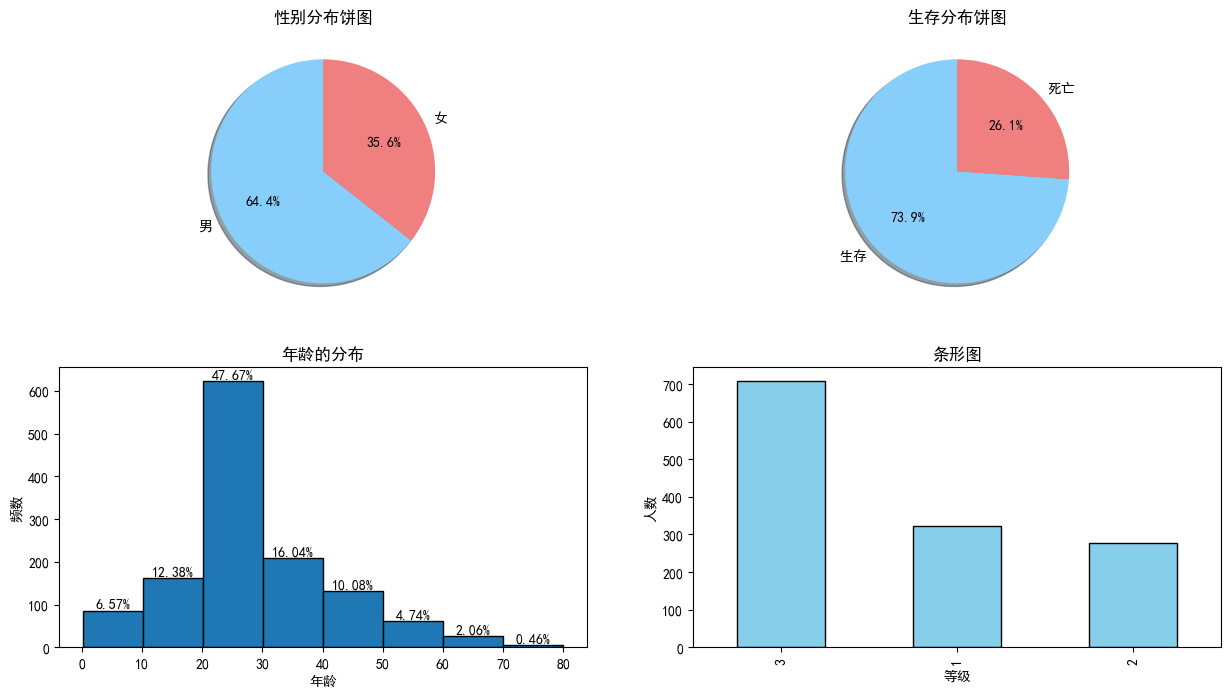

In [199]:
# 绘制子图
fig, ax =plt.subplots(2,2, figsize=(15, 8))

labels=['男','女']
sizes=data['Sex'].value_counts()
colors = [ 'lightskyblue','lightcoral']
ax[0,0].pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # 显示百分比
    shadow=True,  # 添加阴影
    startangle=90  # 旋转角度
)
# 设置标题
ax[0,0].set_title('性别分布饼图')

labels1=['生存','死亡']
sizes1=data['2urvived'].value_counts()
colors1 = [ 'lightskyblue','lightcoral']
ax[0,1].pie(
    sizes1,
    labels=labels1,
    colors=colors1,
    autopct='%1.1f%%',  # 显示百分比
    shadow=True,  # 添加阴影
    startangle=90  # 旋转角度
)
# 设置标题
ax[0,1].set_title('生存分布饼图')

n, bins, patches = ax[1,0].hist(data['Age'],bins=8,edgecolor='black')
total=len(data['Age'])
for i in range(len(n)):
    ax[1,0].text(
        bins[i] + (bins[i+1] - bins[i]) / 2,  # x 位置：柱子中心
        n[i] + 0.1,                            # y 位置：柱子高度上方
        f'{n[i]/total:.2%}',                         # 显示的文本（频率）
        ha='center',                            # 水平对齐方式
        va='bottom'                             # 垂直对齐方式
    )
ax[1,0].set_title('年龄的分布')
ax[1,0].set_xlabel('年龄')
ax[1,0].set_ylabel('频数')

tempt=data['Pclass'].value_counts()
tempt.plot.bar(ax=ax[1,1], color='skyblue', edgecolor='black')
ax[1,1].set_title('条形图')
ax[1,1].set_xlabel('等级')
ax[1,1].set_ylabel('人数')

# 显示图形
plt.show()

可以看出年龄分布在[20,30)岁之间的乘客最多，占47.67%

In [ ]:
# 绘制所有元素的直方图或者条形图的函数。

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique() ##筛序出每一列的唯一值
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

## 相关性分析

类别类属性对生存的影响：  
1. 性别因素的影响：74.20%的女性存活，而0.19的男性存活
2. 乘客等级的影响：1等存活率最高达62.96%，三等座的只有24.23%
数值类属性对生存的影响（直方图表现）：
1. 年龄角度：可以看出死亡乘客中，年龄在15\~30岁居多。存活乘客中0\~5岁存活率高。年龄的因素会影响是否存活，因此作为特征因素
2. 从座位等级而言：
可以看出三等座的乘客死亡占比最多，年龄在集中在15~30岁之间。  
一等座的死亡占比少。  
二等座中年龄小的乘客全部存活了。  
不同等级的座位存活率不同，并且年龄分布也不同。  
考虑将作为等级也作为特征。

In [89]:
# 分类数据对生存率的影响，查看船舱等级的影响
train_data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [104]:
train_data['Pclass'].corr(train_data['Survived'], method='pearson')

np.float64(-0.3384810359610147)

In [92]:
#性别因素的影响
train_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [94]:
train_data[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [110]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [112]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [160]:
survived=train_data[train_data["Survived"]==1]
died=train_data[train_data["Survived"]==0]

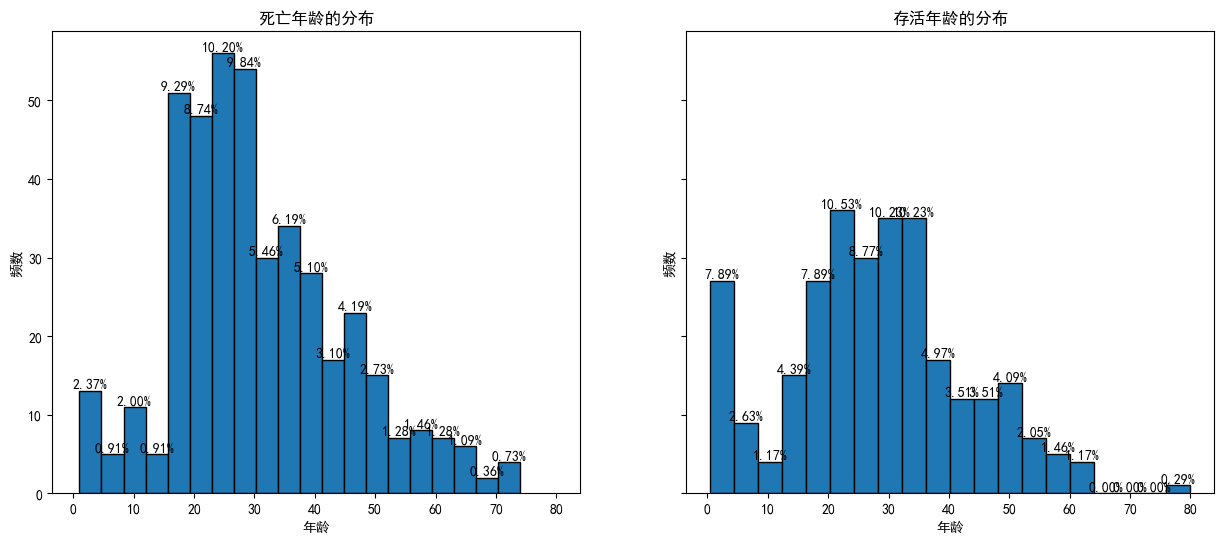

In [194]:
fig, axes =plt.subplots(1,2, sharex=True, sharey=True,figsize=(15, 6))
n, bins, patches = axes[0].hist(died['Age'],bins=20,edgecolor='black')
total=len(died['Age'])
for i in range(len(n)):
    axes[0].text(
        bins[i] + (bins[i+1] - bins[i]) / 2,  # x 位置：柱子中心
        n[i] + 0.1,                            # y 位置：柱子高度上方
        f'{n[i]/total:.2%}',                         # 显示的文本（频率）
        ha='center',                            # 水平对齐方式
        va='bottom'                             # 垂直对齐方式
    )
axes[0].set_title('死亡年龄的分布')
axes[0].set_xlabel('年龄')
axes[0].set_ylabel('频数')

n, bins, patches = axes[1].hist(survived['Age'],bins=20,edgecolor='black')
total=len(survived['Age'])
for i in range(len(n)):
    axes[1].text(
        bins[i] + (bins[i+1] - bins[i]) / 2,  # x 位置：柱子中心
        n[i] + 0.1,                            # y 位置：柱子高度上方
        f'{n[i]/total:.2%}',                         # 显示的文本（频率）
        ha='center',                            # 水平对齐方式
        va='bottom'                             # 垂直对齐方式
    )
axes[1].set_title('存活年龄的分布')
axes[1].set_xlabel('年龄')
axes[1].set_ylabel('频数')
plt.show()

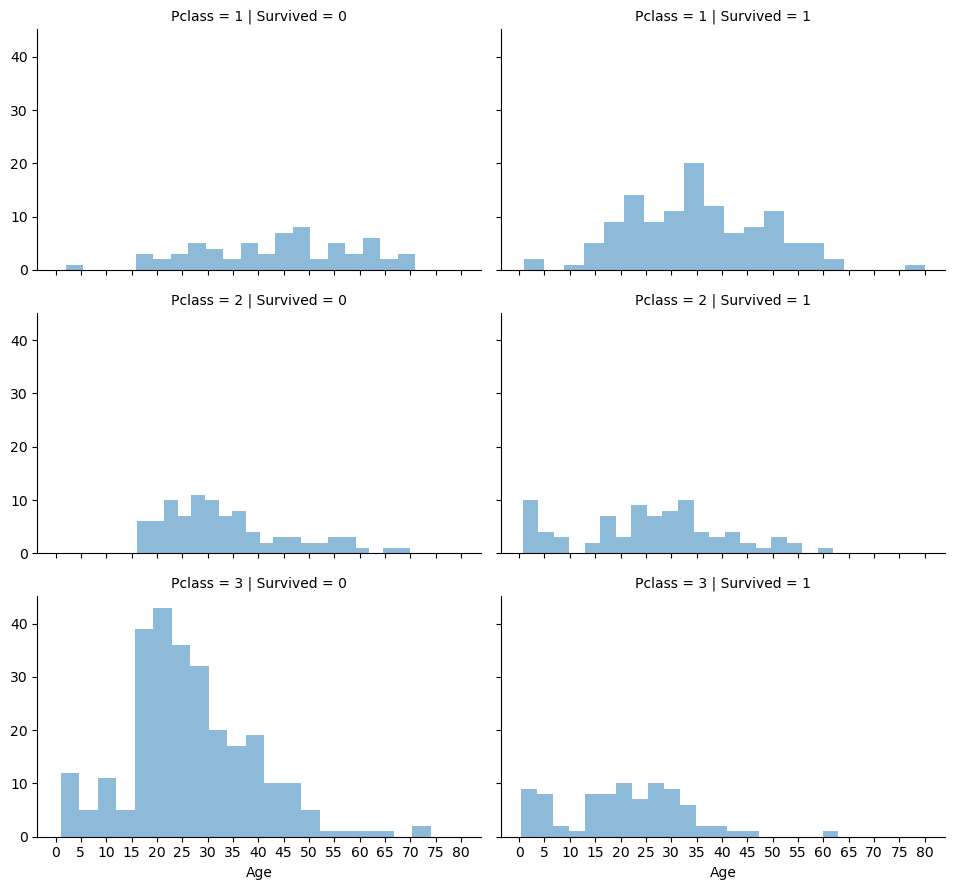

In [37]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', aspect=1.6) 
grid.map(plt.hist, 'Age', bins=20,alpha=.5) 
grid.add_legend()
for ax in grid.axes.flat:
    ax.xaxis.set_major_locator(MultipleLocator(5))
plt.show()

C:\Users\61909\.conda\envs\titanic\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\61909\.conda\envs\titanic\Lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


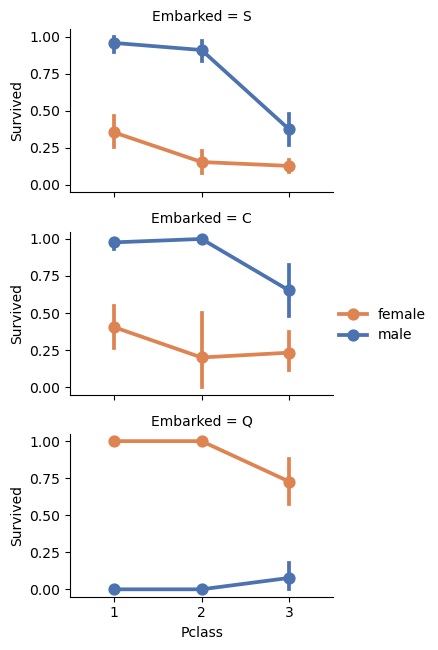

In [47]:
grid = sns.FacetGrid(train_data, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
plt.show()

女性乘客的存活率高于男性
在Embarked中S、C女性死亡的人数低于男性，但是Embarked Q中女性高于男性。  
男性乘客中，在Q口岸的乘客存活率高于S和Q  

性别因素的死亡 随着Embarked的不同而表现不同。
